# Import Libraries

In [1]:
import sys
import os
import glob
import re 
import pandas as pd
import numpy as np
from lxml import etree
import matplotlib.pyplot as plt
import requests
import time
from collections import Counter
import seaborn as sns
from scipy import stats


In [2]:

import functions

# Import Data

In [3]:
metadata = pd.read_csv("./../data/metadata_books_with_tokens_counts_genre_language.tsv", sep="\t", index_col=0)

In [4]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.140496,0.629630,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,0.144000,0.642857,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,0.641667,5.133333,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,0.225352,1.066667,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,0.313725,1.777778,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,0.051095,0.200000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,0.172897,1.000000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,0.143678,0.423729,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,0.188596,1.162162,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN


In [5]:
metadata.translation_period.value_counts(dropna=False)

3_after_1900               5635
NaN                        3561
2_between_1500_and_1900    1980
1_before_1500               105
Name: translation_period, dtype: int64

In [6]:
#metadata.loc[metadata["translation_period"] == "before-1500", "translation_period_color"] = "pink"
#metadata.loc[metadata["translation_period"] == "modern-period", "translation_period_color"] = "red"
#metadata.loc[metadata["translation_period"] == "contemporary-period", "translation_period_color"] = "brown"

In [7]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.140496,0.629630,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,0.144000,0.642857,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,0.641667,5.133333,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,0.225352,1.066667,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,0.313725,1.777778,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,0.051095,0.200000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,0.172897,1.000000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,0.143678,0.423729,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,0.188596,1.162162,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN


In [8]:
language_period_crosstab = pd.crosstab(metadata["language"], metadata["translation_period"])

In [9]:
language_period_crosstab

translation_period,1_before_1500,2_between_1500_and_1900,3_after_1900
language,,,
Bulgarian,0,0,27
Chamorro,0,0,6
Danish,0,0,66
English,0,664,1624
Finnish,0,0,66
French,0,459,725
German,0,345,942
Greek,39,243,135
Italian,0,66,262


In [10]:
modern_contemporary_languages_lt = language_period_crosstab.loc[(language_period_crosstab["3_after_1900"] > 0 ) & (language_period_crosstab["2_between_1500_and_1900"] > 0 )].index.tolist()

In [11]:
modern_contemporary_languages_lt

['English',
 'French',
 'German',
 'Greek',
 'Italian',
 'Latin',
 'Russian',
 'Spanish']

In [12]:
len(modern_contemporary_languages_lt)


8

# Model Century

In [13]:
metadata.loc[(metadata["year"] < 1500) & (metadata["year"] != 0 ), "translation_century"] = "-2ndBC-15th"

In [14]:
metadata.loc[(metadata["year"] < 1600) & (metadata["year"] != 0 )  & (metadata["translation_century"].isna()), "translation_century"] = "16th"

In [15]:
metadata.loc[(metadata["year"] < 1700) & (metadata["year"] != 0 )  & (metadata["translation_century"].isna()), "translation_century"] = "17th"

In [16]:
metadata.loc[(metadata["year"] < 1800) & (metadata["year"] != 0 )  & (metadata["translation_century"].isna()), "translation_century"] = "18th"

In [17]:
metadata.loc[(metadata["year"] < 1900) & (metadata["year"] != 0 )  & (metadata["translation_century"].isna()), "translation_century"] = "19th"

In [18]:
metadata.loc[(metadata["year"] < 2000) & (metadata["year"] != 0 )  & (metadata["translation_century"].isna()), "translation_century"] = "20th"

In [19]:
metadata.loc[(metadata["year"] < 2100) & (metadata["year"] != 0 )  & (metadata["translation_century"].isna()), "translation_century"] = "21st"

In [20]:
metadata.loc[(metadata["year"] >= 1900) & (metadata["year"] != 0 ), "is_contemporary?"] = True
metadata["is_contemporary?"].fillna(False, inplace=True)

In [21]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period,translation_century,is_contemporary?
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,NaN,False
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,NaN,False
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,NaN,False
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,NaN,False
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,NaN,False
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,NaN,False
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,NaN,False
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,NaN,False


In [22]:
metadata["translation_century"].value_counts(dropna=False)

NaN            3561
20th           3470
21st           2165
19th           1086
16th            456
18th            225
17th            213
-2ndBC-15th     105
Name: translation_century, dtype: int64

# Description

In [13]:
metadata.loc[metadata["year"] != 0].shape[0] / metadata.shape[0]

0.6843364949915788

In [14]:
len(metadata.loc[metadata["year"] != 0]["language"].unique())


16

In [15]:
metadata.loc[metadata["year"] != 0]["language"].unique().tolist()


['Danish',
 'English',
 'Finnish',
 'French',
 'German',
 'Greek',
 'Italian',
 'Latin',
 'Portuguese',
 'Romanian',
 'Russian',
 'Spanish',
 'Swedish',
 'Vietnamese',
 'Chamorro',
 'Bulgarian']

# Years

## Unknown Tokens

0.056175707051642834 5.4626545945014865e-05


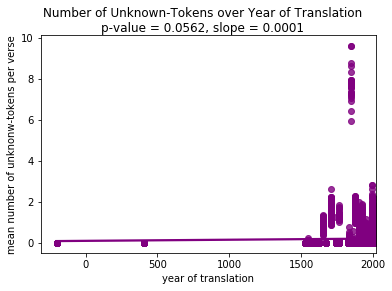

In [16]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[metadata["year"]!=0], "year", "bert_multilingual_cased_count_unks_mean", title = "Number of Unknown-Tokens over Year of Translation", ylabel = "mean number of unknonw-tokens per verse", xlabel = "year of translation", figure_name = "unknown_plot_scatter_w_regression_line")

0.07717031872172102 -0.0001005069866829268


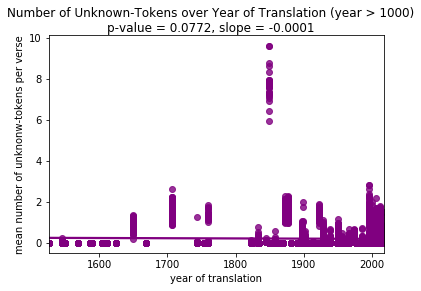

In [17]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[metadata["year"]>1000], "year", "bert_multilingual_cased_count_unks_mean", title = "Number of Unknown-Tokens over Year of Translation (year > 1000)", ylabel = "mean number of unknonw-tokens per verse", xlabel = "year of translation", figure_name = "unknown_plot_scatter_w_regression_line_1000")

0.009298043934904706 -0.0002008423815783745


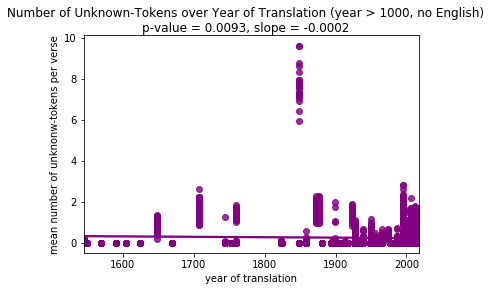

In [18]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["is_English?"] == False)], "year", "bert_multilingual_cased_count_unks_mean", title = "Number of Unknown-Tokens over Year of Translation (year > 1000, no English)", ylabel = "mean number of unknonw-tokens per verse", xlabel = "year of translation", figure_name = "unknown_plot_scatter_w_regression_line_1000_no_english")

1.085602830356973e-13 0.0002925334897016724


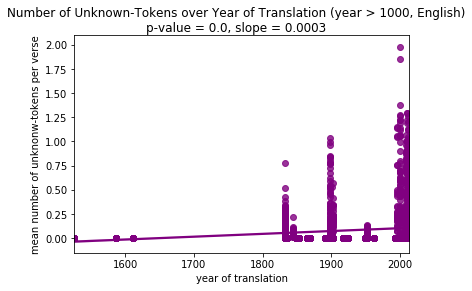

In [19]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["is_English?"] == True)], "year", "bert_multilingual_cased_count_unks_mean", title = "Number of Unknown-Tokens over Year of Translation (year > 1000, English)", ylabel = "mean number of unknonw-tokens per verse", xlabel = "year of translation", figure_name = "unknown_plot_scatter_w_regression_line_1000_english")

1.4811039852734543e-08 0.00043785359747428433


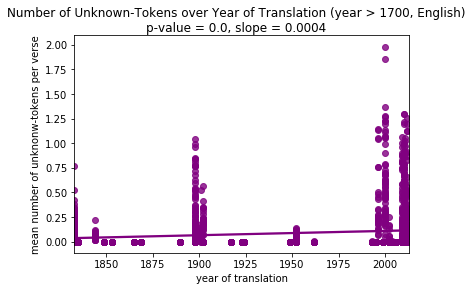

In [20]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1700) & (metadata["is_English?"] == True)], "year", "bert_multilingual_cased_count_unks_mean", title = "Number of Unknown-Tokens over Year of Translation (year > 1700, English)", ylabel = "mean number of unknonw-tokens per verse", xlabel = "year of translation", figure_name = "unknown_plot_scatter_w_regression_line_1700_english")

0.977238322111902 -1.142172060215143e-06


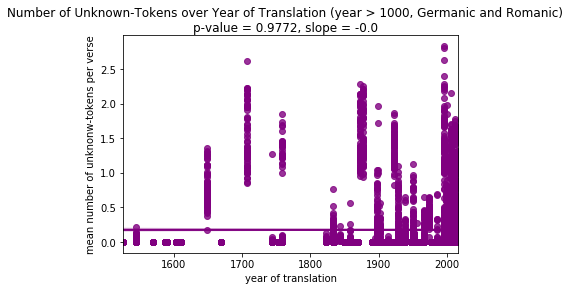

In [21]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["is_Romance_or_Germanic?"] == True)], "year", "bert_multilingual_cased_count_unks_mean", title = "Number of Unknown-Tokens over Year of Translation (year > 1000, Germanic and Romanic)", ylabel = "mean number of unknonw-tokens per verse", xlabel = "year of translation", figure_name = "unknown_plot_scatter_w_regression_line_1000_germanic_romanic")

0.9606137736372239 1.9596031559605743e-06


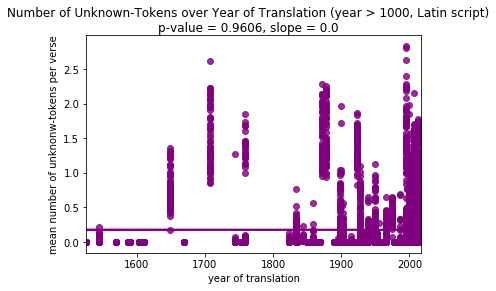

In [22]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["main writing system"] == "Latin script")], "year", "bert_multilingual_cased_count_unks_mean", title = "Number of Unknown-Tokens over Year of Translation (year > 1000, Latin script)", ylabel = "mean number of unknonw-tokens per verse", xlabel = "year of translation", figure_name = "unknown_plot_scatter_w_regression_line_1000_latin_script")

0.027366832633203098 0.00019451613053146448


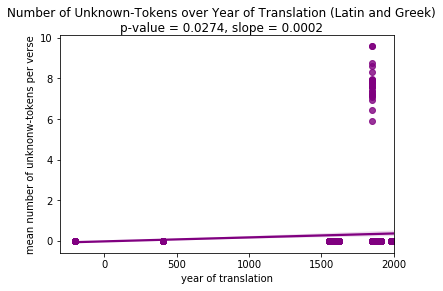

In [23]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]!= 0) & (metadata["language"].isin(["Latin", "Greek"]))], "year", "bert_multilingual_cased_count_unks_mean", title = "Number of Unknown-Tokens over Year of Translation (Latin and Greek)", ylabel = "mean number of unknonw-tokens per verse", xlabel = "year of translation", figure_name = "unknown_plot_scatter_w_regression_line_greek_latin")

## Part Tokens

1.350418188595363e-233 -0.000536722346667321


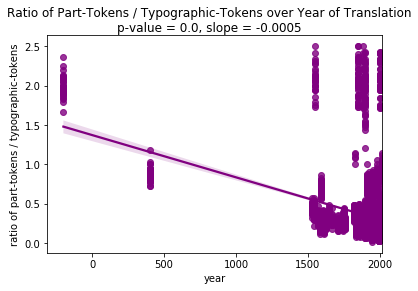

In [24]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[metadata["year"]!=0], "year", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", title = "Ratio of Part-Tokens / Typographic-Tokens over Year of Translation", figure_name = "part_plot_scatter_w_regression_line", ylabel="ratio of part-tokens / typographic-tokens")

1.3495120579124294e-38 -0.00040836852355220717


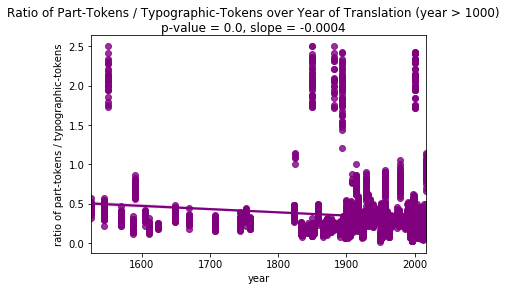

In [25]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[metadata["year"]>1000], "year", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", title = "Ratio of Part-Tokens / Typographic-Tokens over Year of Translation (year > 1000)", figure_name = "part_plot_scatter_w_regression_line_1000", ylabel="ratio of part-tokens / typographic-tokens")

1.244638256552651e-22 -0.00039919523782695103


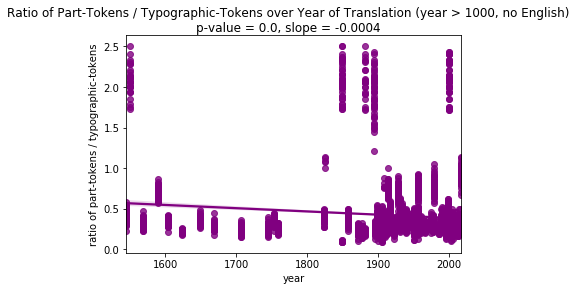

In [26]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["is_English?"] == False)], "year", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", title = "Ratio of Part-Tokens / Typographic-Tokens over Year of Translation (year > 1000, no English)", figure_name = "part_plot_scatter_w_regression_line_1000_no_english", ylabel="ratio of part-tokens / typographic-tokens")

1.5639725756024467e-116 -0.0002510086957575431


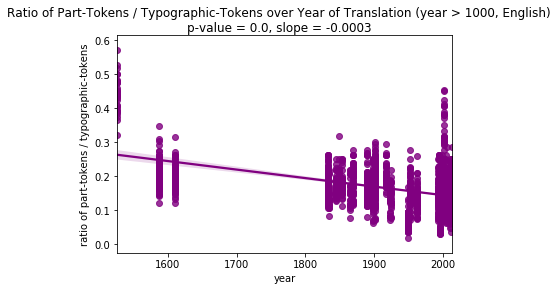

In [27]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["is_English?"] == True)], "year", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", title = "Ratio of Part-Tokens / Typographic-Tokens over Year of Translation (year > 1000, English)", figure_name = "part_plot_scatter_w_regression_line_1000_english", ylabel="ratio of part-tokens / typographic-tokens")

4.837776303769467e-100 -0.0002905227916969378


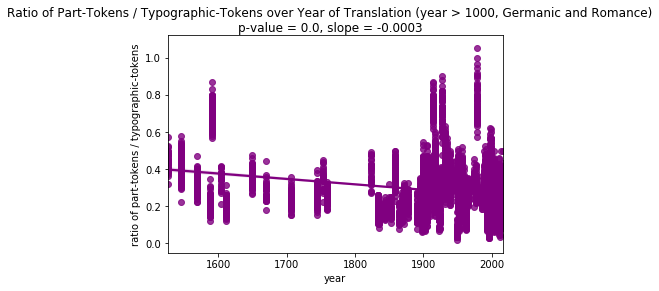

In [28]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["is_Romance_or_Germanic?"] == True)], "year", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", title = "Ratio of Part-Tokens / Typographic-Tokens over Year of Translation (year > 1000, Germanic and Romance)", figure_name = "part_plot_scatter_w_regression_line_1000_germanic_romance", ylabel="ratio of part-tokens / typographic-tokens")

9.758937482479632e-08 -0.001461579116389552


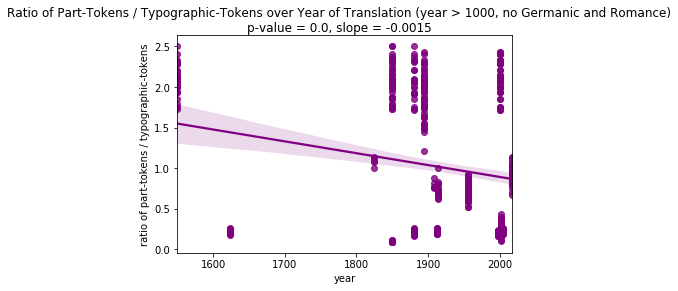

In [29]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["is_Romance_or_Germanic?"] == False)], "year", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", title = "Ratio of Part-Tokens / Typographic-Tokens over Year of Translation (year > 1000, no Germanic and Romance)", figure_name = "part_plot_scatter_w_regression_line_1000_no_germanic_romance", ylabel="ratio of part-tokens / typographic-tokens")

In [30]:
metadata.loc[(metadata["year"]>1000) & (metadata["main writing system"] == "Latin script")]

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,bert_multilingual_cased_count_parts_tokens_median/characters_count_median,bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period
16,229,./../data/bibles/transformed_xml_with_year\SF_...,DAN,Danish OT1931_NT1907,1931,31062,1189,66,zefania,SF_2019-08-29_DAN_DAOT1931NT1907_(DANISH OT193...,...,0.100917,0.440000,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,3_after_1900
18,15,./../data/bibles/transformed_xml_with_year\SF_...,ENG,A Conservative Version,1995,31102,1189,66,zefania,SF_2009-01-20_ENG_ACV_(A CONSERVATIVE VERSION),...,0.032787,0.142857,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,3_after_1900
19,18,./../data/bibles/transformed_xml_with_year\SF_...,ENG,American King James Version,1999,31102,1189,66,zefania,SF_2009-01-20_ENG_BIBLE_AKJV_(AMERICAN KING JA...,...,0.024793,0.107143,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,3_after_1900
20,16,./../data/bibles/transformed_xml_with_year\SF_...,ENG,American Standard Version,1901,31102,1189,66,zefania,SF_2009-01-20_ENG_ASV_(AMERICAN STANDARD VERSION),...,0.040323,0.178571,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,3_after_1900
21,17,./../data/bibles/transformed_xml_with_year\SF_...,ENG,Bible in Basic English,1949,31172,1190,66,zefania,SF_2009-01-20_ENG_BBE_(BIBLE IN BASIC ENGLISH),...,0.016949,0.074074,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,3_after_1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11264,104,/versions/Spanish-Blue-Red-Gold-Letter-Edition...,SPA,Spanish Blue Red and Gold Letter Edition (SRV-...,2014,31103,1189,66,biblegateway,Spanish Blue Red and Gold Letter Edition (SRV-...,...,0.055944,0.246154,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,3_after_1900
11265,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.053412,0.250000,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,3_after_1900
11267,148,./../data/bibles/transformed_xml_with_year\SF_...,SWE,Svenska Folkbibeln (1998),1998,31059,1189,66,zefania,SF_2009-08-01_SWE_SWEFOLK1998_(SVENSKA FOLKBIB...,...,0.080292,0.379310,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,3_after_1900
11268,108,./../data/bibles/transformed_xml_with_year\SF_...,SWE,Swedish 1917 Version,1917,31148,1189,66,zefania,SF_2009-01-20_SWE_SVD_(SWEDISH 1917 VERSION),...,0.093960,0.451613,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,3_after_1900


2.1789450887910624e-63 -0.0002507954814475164


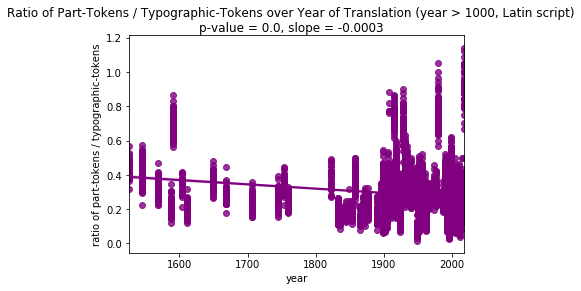

In [31]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["main writing system"] == "Latin script")], "year", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", title = "Ratio of Part-Tokens / Typographic-Tokens over Year of Translation (year > 1000, Latin script)", figure_name = "part_plot_scatter_w_regression_line_1000_latin", ylabel="ratio of part-tokens / typographic-tokens")

0.01553668663602505 -0.0007921862379896444


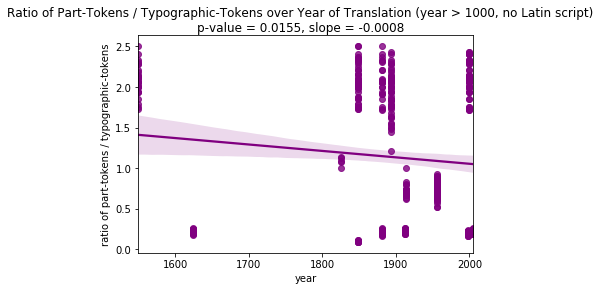

In [32]:
p_value, slope = functions.plot_scatter_w_regression_line(metadata.loc[(metadata["year"]>1000) & (metadata["main writing system"] != "Latin script")], "year", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", title = "Ratio of Part-Tokens / Typographic-Tokens over Year of Translation (year > 1000, no Latin script)", figure_name = "part_plot_scatter_w_regression_line_1000_no_latin", ylabel="ratio of part-tokens / typographic-tokens")

# Periods

## Analyze Part Tokens

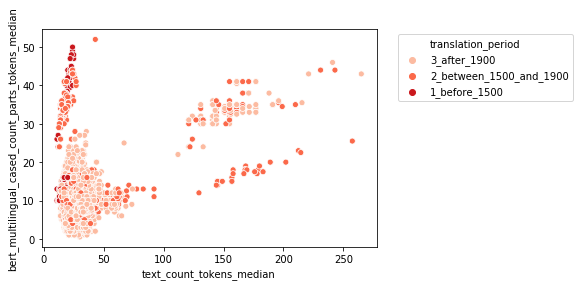

In [33]:
sns.scatterplot(x ="text_count_tokens_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "translation_period", data = metadata.loc[(metadata["translation_period"].notna())],
palette = "Reds", alpha = 1
)

plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


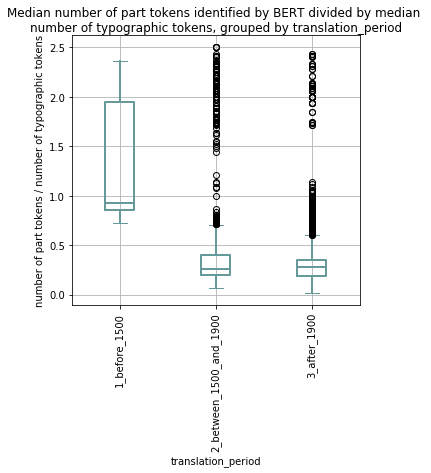

In [34]:
functions.plot_boxplots_by(metadata.loc[(metadata["translation_period"].notna())], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "translation_period", rot = 90, xlabel = "translation_period", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median \nnumber of typographic tokens, grouped by translation_period",
figure_name = "part_tokens_typographic_tokens_translation_period",
figsize=(5,5))

In [29]:
metadata.loc[(metadata["translation_period"].notna())].groupby(["translation_period"])["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"].median()

translation_period
1_before_1500              0.928571
2_between_1500_and_1900    0.260870
3_after_1900               0.275000
Name: bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median, dtype: float64

In [30]:
results_period_parts_df = functions.test_differences_columns(metadata.loc[(metadata["translation_period"].notna())], "translation_period", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")

In [31]:
results_period_parts_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,1_before_1500,2_between_1500_and_1900,5.003544e-30,15.614680,1.289898,0.434849,***
1,1_before_1500,3_after_1900,2.705510e-34,18.243126,1.289898,0.310615,***
2,2_between_1500_and_1900,3_after_1900,1.146629e-25,10.600425,0.434849,0.310615,***


### Only Latin and Greek

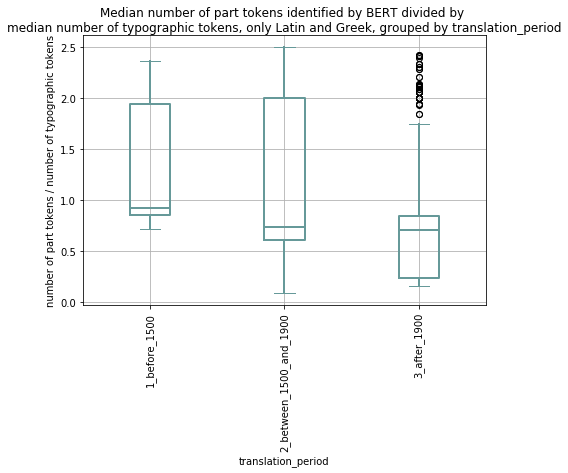

In [18]:
functions.plot_boxplots_by(metadata.loc[(metadata["translation_period"].notna()) & (metadata["language"].isin(["Latin", "Greek"])) ], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "translation_period", rot = 90, xlabel = "translation_period", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by \nmedian number of typographic tokens, only Latin and Greek, grouped by translation_period",
figure_name = "part_tokens_typographic_tokens_translation_period_latin_greek",
figsize=(7,5))

In [19]:
metadata.loc[(metadata["translation_period"].notna()) & (metadata["language"].isin(["Latin", "Greek"])) ].groupby(["translation_period"])["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"].median()

translation_period
1_before_1500              0.928571
2_between_1500_and_1900    0.740741
3_after_1900               0.708333
Name: bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median, dtype: float64

In [20]:
results_period_parts_latin_greek_df = functions.test_differences_columns(metadata.loc[(metadata["translation_period"].notna()) & (metadata["language"].isin(["Latin", "Greek"])) ], "translation_period", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")

In [21]:
results_period_parts_latin_greek_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,1_before_1500,2_between_1500_and_1900,5.162792e-02,1.956009,1.289898,1.157823,
1,1_before_1500,3_after_1900,7.983163e-10,6.411407,1.289898,0.856291,***
2,2_between_1500_and_1900,3_after_1900,3.026424e-07,5.178497,1.157823,0.856291,***


### Only Selected Languages

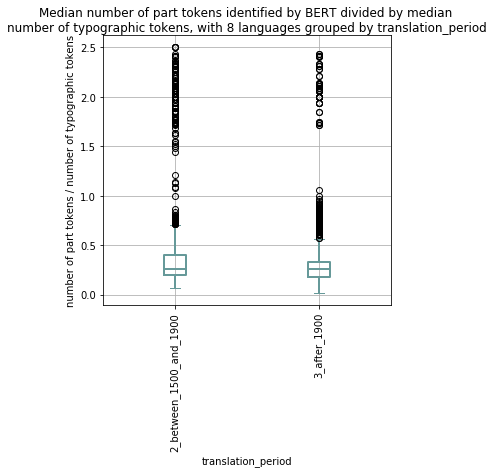

In [22]:
functions.plot_boxplots_by(metadata.loc[(metadata["translation_period"].isin(['2_between_1500_and_1900', '3_after_1900']))  & (metadata["language"].isin(modern_contemporary_languages_lt)) ], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "translation_period", rot = 90, xlabel = "translation_period", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median \nnumber of typographic tokens, with " + str(len(modern_contemporary_languages_lt)) + " languages grouped by translation_period",
figure_name = "part_tokens_typographic_tokens_translation_period_selected_languages",
figsize=(5,5))


In [23]:
metadata.loc[(metadata["translation_period"].isin(['2_between_1500_and_1900', '3_after_1900']))  & (metadata["language"].isin(modern_contemporary_languages_lt)) ].groupby(["translation_period"])["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"].median()

translation_period
2_between_1500_and_1900    0.260870
3_after_1900               0.263158
Name: bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median, dtype: float64

In [24]:
metadata.loc[(metadata["translation_period"].isin(['2_between_1500_and_1900', '3_after_1900']))  & (metadata["language"].isin(modern_contemporary_languages_lt)) ].groupby(["translation_period"])["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"].mean()

translation_period
2_between_1500_and_1900    0.434849
3_after_1900               0.289525
Name: bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median, dtype: float64

In [25]:
results_period_parts_selected_languages_df = functions.test_differences_columns(metadata.loc[(metadata["translation_period"].isin(['2_between_1500_and_1900', '3_after_1900']))  & (metadata["language"].isin(modern_contemporary_languages_lt)) ], "translation_period", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")

In [26]:
results_period_parts_selected_languages_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,2_between_1500_and_1900,3_after_1900,3.872134e-34,12.381375,0.434849,0.289525,***


## Analyze Unknow Tokens

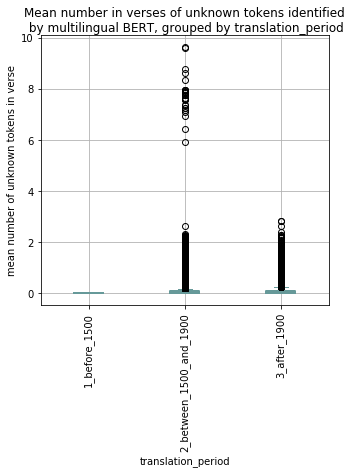

In [38]:
functions.plot_boxplots_by(metadata.loc[(metadata["translation_period"].notna())], "bert_multilingual_cased_count_unks_mean", "translation_period",
rot = 90, xlabel = "translation_period", ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified\n by multilingual BERT, grouped by translation_period",
figure_name = "unknown_tokens_typographic_tokens_translation_period",
figsize= (5,5)
)

In [40]:
metadata.loc[(metadata["translation_period"].notna())].groupby(["translation_period"])["bert_multilingual_cased_count_unks_mean"].mean()

translation_period
1_before_1500              0.000000
2_between_1500_and_1900    0.329255
3_after_1900               0.145380
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [ ]:
metadata.loc[(metadata["translation_period"].notna())].groupby(["translation_period"])["bert_multilingual_cased_count_unks_mean"].mean()


In [42]:
results_period_unknown_df = functions.test_differences_columns(metadata.loc[(metadata["translation_period"].notna())], "translation_period", "bert_multilingual_cased_count_unks_mean")

In [43]:
results_period_unknown_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,1_before_1500,2_between_1500_and_1900,3.777113e-45,-14.463963,0.000000,0.329255,***
1,1_before_1500,3_after_1900,2.684647e-208,-32.143796,0.000000,0.145380,***
2,2_between_1500_and_1900,3_after_1900,3.706705e-15,7.922650,0.329255,0.145380,***


# Analyze Centuries

## Unknown Tokens

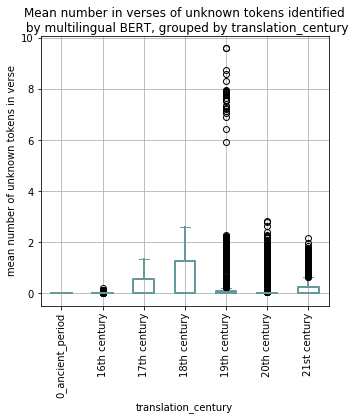

In [28]:
functions.plot_boxplots_by(metadata.loc[(metadata["translation_century"].notna())], "bert_multilingual_cased_count_unks_mean", "translation_century",
rot = 90, xlabel = "translation_century", ylabel = "mean number of unknown tokens in verse", title = "Mean number in verses of unknown tokens identified\n by multilingual BERT, grouped by translation_century",
figure_name = "unknown_tokens_typographic_tokens_century",
figsize= (5,5)
)




In [29]:
metadata.loc[(metadata["translation_century"].notna())].groupby(["translation_century"])["bert_multilingual_cased_count_unks_mean"].mean()



translation_century
0_ancient_period    0.000000
16th century        0.008384
17th century        0.244464
18th century        0.624112
19th century        0.419526
20th century        0.103588
21st century        0.212362
Name: bert_multilingual_cased_count_unks_mean, dtype: float64

In [30]:
results_century_unknown_df = functions.test_differences_columns(metadata.loc[(metadata["translation_century"].notna())], "translation_century", "bert_multilingual_cased_count_unks_mean")


In [31]:
results_century_unknown_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,0_ancient_period,16th century,1.046439e-12,-7.331845,0.000000,0.008384,***
1,0_ancient_period,17th century,8.266824e-17,-9.069277,0.000000,0.244464,***
2,0_ancient_period,18th century,2.330638e-26,-12.129013,0.000000,0.624112,***
3,0_ancient_period,19th century,8.854587e-26,-10.772533,0.000000,0.419526,***
4,0_ancient_period,20th century,6.653459e-80,-19.429297,0.000000,0.103588,***
5,0_ancient_period,21st century,5.924621e-138,-26.923626,0.000000,0.212362,***
6,16th century,17th century,6.587960e-16,-8.750364,0.008384,0.244464,***
7,16th century,18th century,7.809466e-26,-11.963120,0.008384,0.624112,***
8,16th century,19th century,7.492995e-25,-10.552696,0.008384,0.419526,***
9,16th century,20th century,1.104404e-65,-17.459645,0.008384,0.103588,***


## Part Tokens

In [22]:
metadata

,index,path,language_code,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,codebook,title_English,genre,genre-multilabel,wikid,division,original_language,translation_period,in_Latin_script?,translation_century
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,NaN
1,7,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Version,0,31102,1189,66,zefania,SF_2009-01-20_ALB_ALB1_(ALBANIAN VERSION),...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,True,NaN
2,161,./../data/bibles/transformed_xml_with_year\SF_...,ARA,New Arabic Version (Ketab El Hayat),0,31101,1189,66,zefania,SF_2012-01-07_ARA_ARANAV_(NEW ARABIC VERSION (...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,NaN
3,8,./../data/bibles/transformed_xml_with_year\SF_...,ARA,Smith Van Dyke Arabic Bible,0,31102,1189,66,zefania,SF_2009-01-20_ARA_ARASVD_(SMITH VAN DYKE ARABI...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,NaN
4,162,./../data/bibles/transformed_xml_with_year\SF_...,AZB,Description_en=Southern Azeri Translation,0,31102,1189,66,zefania,SF_2012-01-07_AZB_AZERI_(DESCRIPTION_EN=SOUTHE...,...,GEN,Genesis,historical,historical,Q9184,Pentateuch,hebrew,NaN,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11276,113,./../data/bibles/transformed_xml_with_year\SF_...,VIE,Vietnamese Version,0,31102,1189,66,zefania,SF_2009-01-20_VIE_VIE_(VIETNAMESE VERSION),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,NaN
11277,199,./../data/bibles/transformed_xml_with_year\SF_...,WIU,The New Testament,0,7817,260,27,zefania,SF_2014-05-12_WIU_WITNT_(THE NEW TESTAMENT),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,NaN
11278,123,./../data/bibles/transformed_xml_with_year\SF_...,XKL,Klingon Version,0,31083,1189,66,zefania,SF_2009-01-22_XKL_KLINGON_(KLINGON VERSION),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,NaN
11279,200,./../data/bibles/transformed_xml_with_year\SF_...,YBY,The New Testament,0,7482,241,27,zefania,SF_2014-05-12_YBY_YAWNT_(THE NEW TESTAMENT),...,REV,Revelation,apocalyptic,"apocalyptic, prophecy",Q42040,Revelation,greek,NaN,True,NaN


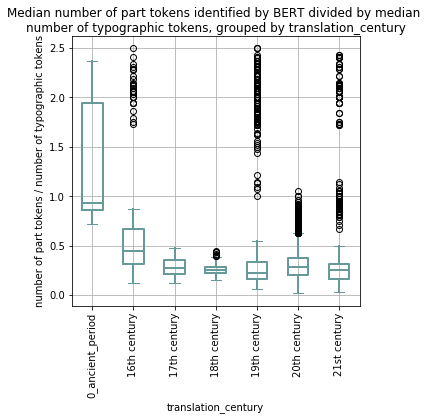

In [23]:
functions.plot_boxplots_by(metadata.loc[(metadata["translation_century"].notna())], "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "translation_century", rot = 90, xlabel = "translation_century", ylabel = "number of part tokens / number of typographic tokens", title = "Median number of part tokens identified by BERT divided by median \nnumber of typographic tokens, grouped by translation_century",
figure_name = "part_tokens_typographic_tokens_century",
figsize=(5,5))



In [24]:
metadata.loc[(metadata["translation_century"].notna())].groupby(["translation_century"])["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"].median()


translation_century
0_ancient_period    0.928571
16th century        0.448276
17th century        0.270270
18th century        0.256410
19th century        0.218750
20th century        0.286797
21st century        0.258065
Name: bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median, dtype: float64

In [25]:

results_centuries_parts_df = functions.test_differences_columns(metadata.loc[(metadata["translation_century"].notna())], "translation_century", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")

In [26]:
results_centuries_parts_df

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,significance
0,0_ancient_period,16th century,3.964295e-25,12.846848,1.289898,0.555473,***
1,0_ancient_period,17th century,1.844697e-35,18.730038,1.289898,0.280604,***
2,0_ancient_period,18th century,5.100478e-36,19.145868,1.289898,0.261693,***
3,0_ancient_period,19th century,1.087495e-29,14.825692,1.289898,0.450328,***
4,0_ancient_period,20th century,3.430162e-34,18.201226,1.289898,0.313236,***
5,0_ancient_period,21st century,1.283773e-34,18.201371,1.289898,0.306414,***
6,16th century,17th century,7.489676e-35,13.268217,0.555473,0.280604,***
7,16th century,18th century,6.767894e-40,14.517315,0.555473,0.261693,***
8,16th century,19th century,1.077633e-04,3.885439,0.555473,0.450328,***
9,16th century,20th century,2.583268e-29,12.040895,0.555473,0.313236,***


# Is Contemporary?

## Unknown Tokens

In [23]:
functions.test_differences_columns(metadata.loc[(metadata["translation_century"].notna()) & (metadata["bert_multilingual_cased_count_unks_mean"] < 4)], "is_contemporary?", "bert_multilingual_cased_count_unks_mean")

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,median_value_1,median_value_2,significance
0,False,True,5.593528e-09,5.846918,0.215379,0.14538,0.0,0.0,***


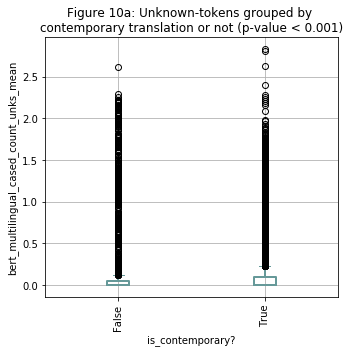

In [25]:
functions.plot_boxplots_by(metadata.loc[(metadata["translation_century"].notna()) & (metadata["bert_multilingual_cased_count_unks_mean"] < 4)], "bert_multilingual_cased_count_unks_mean", "is_contemporary?",
rot = 90, xlabel = "is_contemporary?", ylabel = "bert_multilingual_cased_count_unks_mean", title = "Figure 10a: Unknown-tokens grouped by \ncontemporary translation or not (p-value < 0.001)",
figure_name = "figure10a_unknown_tokens_contemporary",
figsize=(5,5))

## Part Tokens

In [26]:
functions.test_differences_columns(metadata.loc[(metadata["translation_century"].notna()) & (metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 1.5)], "is_contemporary?", "bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median")

,value1,value2,pvalue,statistic,mean_value_1,mean_value_2,median_value_1,median_value_2,significance
0,False,True,0.000008,4.476269,0.315378,0.293341,0.25641,0.272727,***


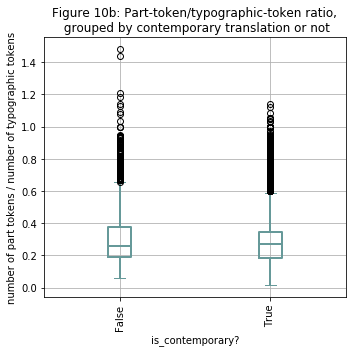

In [28]:
functions.plot_boxplots_by(metadata.loc[(metadata["translation_century"].notna()) & (metadata["bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median"] < 1.5)],
"bert_multilingual_cased_count_parts_tokens_median/text_count_tokens_median", "is_contemporary?",
rot = 90, xlabel = "is_contemporary?", ylabel = "number of part tokens / number of typographic tokens",
title = "Figure 10b: Part-token/typographic-token ratio,\n grouped by contemporary translation or not",
figure_name = "figure10b_part_tokens_typographic_tokens_contemporary",
figsize=(5,5))

# Old Things

In [27]:
metadata.loc[metadata["year"]< 1500, "period"] = "before renaissance"
metadata.loc[metadata["year"]< 1500, "period_color"] = "orange"

metadata.loc[(metadata["year"]> 1500) & (metadata["year"]< 1900), "period"] = "modern period"
metadata.loc[(metadata["year"]> 1500) & (metadata["year"]< 1900), "period_color"] = "red"

metadata.loc[(metadata["year"]> 1900) , "period"] = "contemporary"
metadata.loc[(metadata["year"]> 1900) , "period_color"] = "brown"


In [9]:
colors_dc = {"ENG": "blue", "FRE": "red", "LAT": "orange", "SPA": "green", "ITA" : "pink"}

In [10]:
metadata["language_color"] = "gray"

In [11]:
metadata.loc[metadata["language"].isin(["ENG", "FRE", "LAT", "SPA", "ITA"]), "language_color"] = metadata["language"]

In [12]:
metadata["language_color"] = metadata["language_color"].map(colors_dc).fillna("gray")

In [13]:
metadata

,index,path,language,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,xlm_roberta_base_count_parts_tokens_std,xlm_roberta_base_count_unks_mean,xlm_roberta_base_count_unks_median,xlm_roberta_base_count_unks_std,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean,mt5_base_count_starting_tokens_mean/text_count_tokens_mean,xlm_roberta_base_count_starting_tokens_mean/text_count_tokens_mean,language_color
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.477143,0.0,0.686471,6.765773,0.640028,0.112765,0.889763,0.889763,gray
1,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.339044,0.0,0.559234,6.861003,0.659416,0.088058,0.902305,0.902305,gray
2,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.369759,0.0,0.525919,6.657666,0.626605,0.048952,0.922347,0.922347,gray
3,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.434412,0.0,0.637323,7.011441,0.678076,0.069024,0.910137,0.910137,gray
4,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.324601,0.0,0.521476,6.626879,0.623845,0.069149,0.899222,0.899222,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.531646,0.0,0.657022,5.680684,0.305417,0.065217,0.863150,0.863150,green
11444,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.034188,0.0,0.182493,5.773759,0.355804,0.001315,0.857613,0.857613,green
11445,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.186047,0.0,0.393750,5.854817,0.289688,0.005427,0.902985,0.902985,green
11446,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.118012,0.0,0.323629,5.668162,0.271194,0.028465,0.874381,0.874381,green


In [14]:

metadata

,index,path,language,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,xlm_roberta_base_count_parts_tokens_std,xlm_roberta_base_count_unks_mean,xlm_roberta_base_count_unks_median,xlm_roberta_base_count_unks_std,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean,mt5_base_count_starting_tokens_mean/text_count_tokens_mean,xlm_roberta_base_count_starting_tokens_mean/text_count_tokens_mean,language_color
0,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.477143,0.0,0.686471,6.765773,0.640028,0.112765,0.889763,0.889763,gray
1,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.339044,0.0,0.559234,6.861003,0.659416,0.088058,0.902305,0.902305,gray
2,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.369759,0.0,0.525919,6.657666,0.626605,0.048952,0.922347,0.922347,gray
3,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.434412,0.0,0.637323,7.011441,0.678076,0.069024,0.910137,0.910137,gray
4,232,./../data/bibles/transformed_xml_with_year\SF_...,ALB,Albanian Bible Tosk,0,31102,1189,66,zefania,SF_2019-09-02_ALB_ALSSHQ1994EB_(ALBANIAN BIBLE...,...,0.0,0.324601,0.0,0.521476,6.626879,0.623845,0.069149,0.899222,0.899222,gray
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.531646,0.0,0.657022,5.680684,0.305417,0.065217,0.863150,0.863150,green
11444,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.034188,0.0,0.182493,5.773759,0.355804,0.001315,0.857613,0.857613,green
11445,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.186047,0.0,0.393750,5.854817,0.289688,0.005427,0.902985,0.902985,green
11446,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.118012,0.0,0.323629,5.668162,0.271194,0.028465,0.874381,0.874381,green


In [16]:
metadata["number_books_translation"]

0        66
1        66
2        66
3        66
4        66
         ..
11443    66
11444    66
11445    66
11446    66
11447    66
Name: number_books_translation, Length: 11448, dtype: int64

In [20]:
metadata["number_books_translation"].mean()

59.76458770090846

In [21]:
colors_dc

{'ENG': 'blue', 'FRE': 'red', 'LAT': 'orange', 'SPA': 'green', 'ITA': 'pink'}

In [22]:
selected_languages_period = metadata.loc[(metadata["year"] > 1500) & (metadata["language"].isin(languages_lt))]

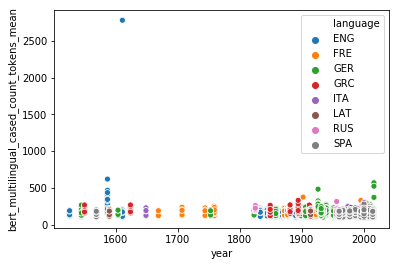

In [23]:
sns.scatterplot(data=selected_languages_period, x="year", y="bert_multilingual_cased_count_tokens_mean", hue="language")

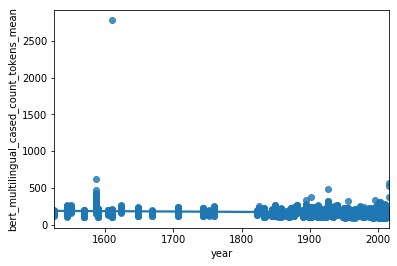

In [24]:
sns.regplot(x="year", y="bert_multilingual_cased_count_tokens_mean", data=selected_languages_period);

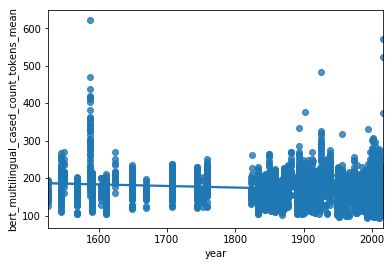

In [25]:
sns.regplot(x="year", y="bert_multilingual_cased_count_tokens_mean", data=selected_languages_period.loc[selected_languages_period["bert_multilingual_cased_count_tokens_mean"]<1000]);

In [27]:
slope, intercept, r_value, p_value, std_err = stats.linregress(selected_languages_period.loc[selected_languages_period["bert_multilingual_cased_count_tokens_mean"]<1000]["year"], selected_languages_period.loc[selected_languages_period["bert_multilingual_cased_count_tokens_mean"]<1000]["bert_multilingual_cased_count_tokens_mean"])
p_value


6.126966078426955e-37

In [28]:
slope

-0.04217984595536358

In [29]:
selected_languages_period.loc[selected_languages_period["bert_multilingual_cased_count_tokens_mean"]<1000]

,index,path,language,title,year,number_verses_translation,number_chapters_translation,number_books_translation,source,file_name_translation,...,xlm_roberta_base_count_parts_tokens_std,xlm_roberta_base_count_unks_mean,xlm_roberta_base_count_unks_median,xlm_roberta_base_count_unks_std,bert_multilingual_cased_count_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_parts_tokens_mean/text_count_tokens_mean,bert_multilingual_cased_count_unks_mean/text_count_tokens_mean,mt5_base_count_starting_tokens_mean/text_count_tokens_mean,xlm_roberta_base_count_starting_tokens_mean/text_count_tokens_mean,language_color
1324,15,./../data/bibles/transformed_xml_with_year\SF_...,ENG,A Conservative Version,1995,31102,1189,66,zefania,SF_2009-01-20_ENG_ACV_(A CONSERVATIVE VERSION),...,0.0,0.121429,0.0,0.362026,4.975140,0.154188,0.004151,0.880757,0.880757,blue
1325,15,./../data/bibles/transformed_xml_with_year\SF_...,ENG,A Conservative Version,1995,31102,1189,66,zefania,SF_2009-01-20_ENG_ACV_(A CONSERVATIVE VERSION),...,0.0,0.042381,0.0,0.226829,5.107670,0.173612,0.001374,0.891950,0.891950,blue
1326,15,./../data/bibles/transformed_xml_with_year\SF_...,ENG,A Conservative Version,1995,31102,1189,66,zefania,SF_2009-01-20_ENG_ACV_(A CONSERVATIVE VERSION),...,0.0,0.026684,0.0,0.168965,5.118601,0.165385,0.000841,0.897661,0.897661,blue
1327,15,./../data/bibles/transformed_xml_with_year\SF_...,ENG,A Conservative Version,1995,31102,1189,66,zefania,SF_2009-01-20_ENG_ACV_(A CONSERVATIVE VERSION),...,0.0,0.120102,0.0,0.380767,5.245131,0.175022,0.004148,0.888467,0.888467,blue
1328,15,./../data/bibles/transformed_xml_with_year\SF_...,ENG,A Conservative Version,1995,31102,1189,66,zefania,SF_2009-01-20_ENG_ACV_(A CONSERVATIVE VERSION),...,0.0,0.058087,0.0,0.248227,5.199712,0.202287,0.001751,0.899475,0.899475,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11443,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.531646,0.0,0.657022,5.680684,0.305417,0.065217,0.863150,0.863150,green
11444,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.034188,0.0,0.182493,5.773759,0.355804,0.001315,0.857613,0.857613,green
11445,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.186047,0.0,0.393750,5.854817,0.289688,0.005427,0.902985,0.902985,green
11446,105,/versions/Traducción-en-lenguaje-actual-TLA-Bi...,SPA,Traducción en lenguaje actual (TLA),2000,26654,1189,66,biblegateway,Traducción en lenguaje actual (TLA),...,0.0,0.118012,0.0,0.323629,5.668162,0.271194,0.028465,0.874381,0.874381,green


In [30]:
slope, intercept, r_value, p_value, std_err = stats.linregress( metadata.loc[(metadata["year"]> 0) & (metadata["year"]> 0)]["year"],  metadata.loc[(metadata["year"]> 0)]["bert_multilingual_cased_count_tokens_mean"])
p_value

6.6550872172318434e-09

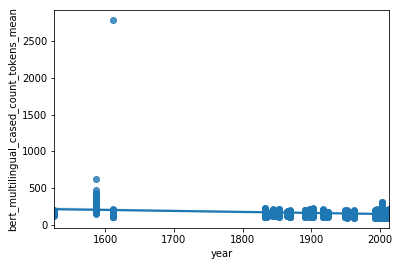

In [31]:
sns.regplot(x="year", y="bert_multilingual_cased_count_tokens_mean", data=metadata.loc[(metadata["language"].isin(["ENG"])) & (metadata["year"]> 0)]);

In [32]:
slope, intercept, r_value, p_value, std_err = stats.linregress( metadata.loc[(metadata["language"].isin(["ENG"])) & (metadata["year"]> 0)]["year"],  metadata.loc[(metadata["language"].isin(["ENG"])) & (metadata["year"]> 0)]["bert_multilingual_cased_count_tokens_mean"])
print(slope, p_value)


-0.137728618007221 3.1376504134105943e-32


In [33]:
slope, intercept, r_value, p_value, std_err = stats.linregress( metadata.loc[(metadata["language"].isin(["GER"])) & (metadata["year"]> 0)]["year"],  metadata.loc[(metadata["language"].isin(["GER"])) & (metadata["year"]> 0)]["bert_multilingual_cased_count_tokens_mean"])
print(slope, p_value)


0.0201621822395964 0.0069130606220889484


In [34]:
slope, intercept, r_value, p_value, std_err = stats.linregress( metadata.loc[(metadata["language"].isin(["SPA"])) & (metadata["year"]> 0)]["year"],  metadata.loc[(metadata["language"].isin(["SPA"])) & (metadata["year"]> 0)]["bert_multilingual_cased_count_tokens_mean"])
print(slope, p_value)


0.023880038540559166 0.0023316097483881038


In [35]:
slope, intercept, r_value, p_value, std_err = stats.linregress( metadata.loc[(metadata["language"].isin(["RUS"])) & (metadata["year"]> 0)]["year"],  metadata.loc[(metadata["language"].isin(["RUS"])) & (metadata["year"]> 0)]["bert_multilingual_cased_count_tokens_mean"])
print(slope, p_value)


-0.3914363169538041 0.0007340773892176176


In [36]:
slope, intercept, r_value, p_value, std_err = stats.linregress( metadata.loc[(metadata["language"].isin(["LAT"])) & (metadata["year"]> 0)]["year"],  metadata.loc[(metadata["language"].isin(["LAT"])) & (metadata["year"]> 0)]["bert_multilingual_cased_count_tokens_mean"])
print(slope, p_value)


0.0052946796357091755 0.03850503827219853


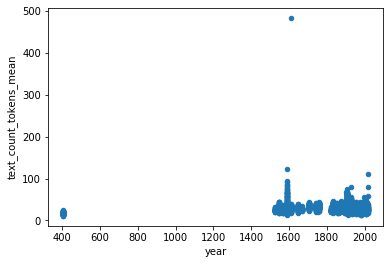

In [37]:

metadata.loc[(metadata["year"] != 0) & (metadata["language"].isin(["GER", "ENG", "SPA", "ITA", "FRE", "LAT", "RUS", "GRE"])) ].plot.scatter("year", "text_count_tokens_mean")


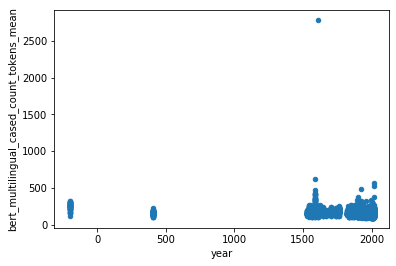

In [38]:
metadata.loc[(metadata["year"] != 0)].plot.scatter("year", "bert_multilingual_cased_count_tokens_mean")


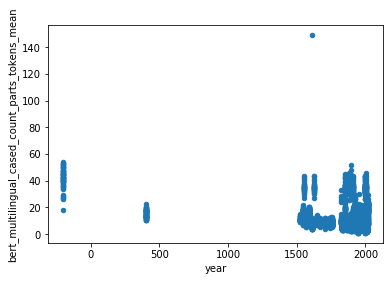

In [39]:
metadata.loc[(metadata["year"] != 0)].plot.scatter("year", "bert_multilingual_cased_count_parts_tokens_mean")


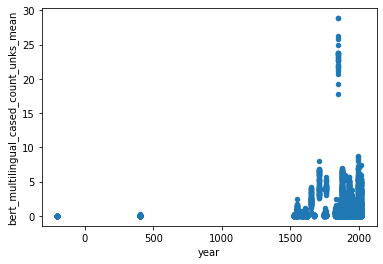

In [40]:

metadata.loc[(metadata["year"] != 0)].plot.scatter("year", "bert_multilingual_cased_count_unks_mean")


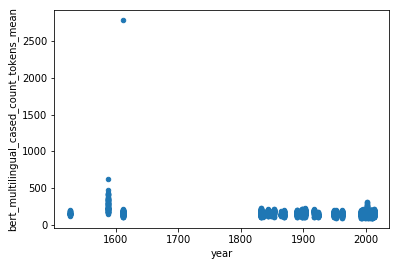

In [41]:
metadata.loc[(metadata["year"] != 0) & (metadata["language"] == "ENG")].plot.scatter("year", "bert_multilingual_cased_count_tokens_mean")

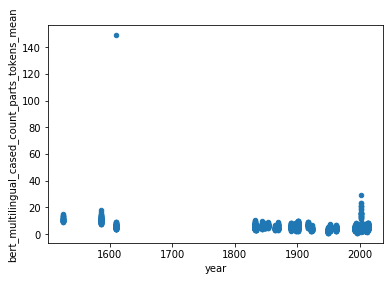

In [42]:
metadata.loc[(metadata["year"] != 0) & (metadata["language"] == "ENG")].plot.scatter("year", "bert_multilingual_cased_count_parts_tokens_mean")

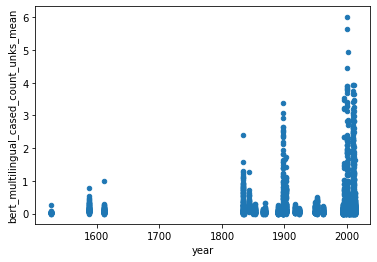

In [43]:

metadata.loc[(metadata["year"] != 0)& (metadata["language"] == "ENG")].plot.scatter("year", "bert_multilingual_cased_count_unks_mean")


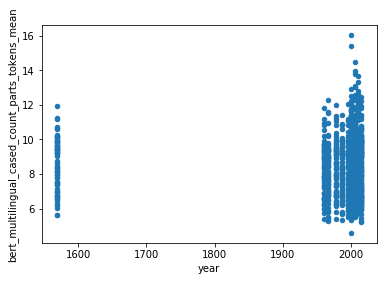

In [44]:
metadata.loc[(metadata["year"] != 0) & (metadata["language"] == "SPA")].plot.scatter("year", "bert_multilingual_cased_count_parts_tokens_mean")

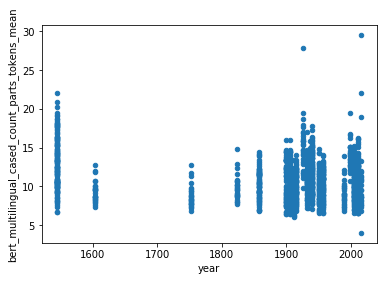

In [45]:
metadata.loc[(metadata["year"] != 0) & (metadata["language"] == "GER")].plot.scatter("year", "bert_multilingual_cased_count_parts_tokens_mean")

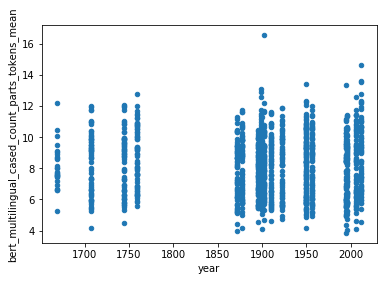

In [46]:
metadata.loc[(metadata["year"] != 0) & (metadata["language"] == "FRE")].plot.scatter("year", "bert_multilingual_cased_count_parts_tokens_mean")

In [52]:
metadata.columns.tolist()[20:]

['bert_cased_count_tokens_std',
 'bert_cased_count_starting_tokens_mean',
 'bert_cased_count_starting_tokens_median',
 'bert_cased_count_starting_tokens_std',
 'bert_cased_count_parts_tokens_mean',
 'bert_cased_count_parts_tokens_median',
 'bert_cased_count_parts_tokens_std',
 'bert_cased_count_unks_mean',
 'bert_cased_count_unks_median',
 'bert_cased_count_unks_std',
 'bert_multilingual_cased_count_tokens_mean',
 'bert_multilingual_cased_count_tokens_median',
 'bert_multilingual_cased_count_tokens_std',
 'bert_multilingual_cased_count_starting_tokens_mean',
 'bert_multilingual_cased_count_starting_tokens_median',
 'bert_multilingual_cased_count_starting_tokens_std',
 'bert_multilingual_cased_count_parts_tokens_mean',
 'bert_multilingual_cased_count_parts_tokens_median',
 'bert_multilingual_cased_count_parts_tokens_std',
 'bert_multilingual_cased_count_unks_mean',
 'bert_multilingual_cased_count_unks_median',
 'bert_multilingual_cased_count_unks_std',
 'mt5_base_count_tokens_mean',
 'm

In [56]:
metadata.loc[metadata.period_color.notna()]["period_color"].value_counts(dropna=False)

blue      5635
yellow    3694
green     2053
Name: period_color, dtype: int64

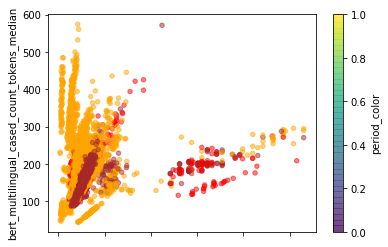

In [61]:
metadata.loc[(metadata.period_color.notna()) & (metadata.bert_multilingual_cased_count_tokens_median < 1000)].plot.scatter(x="text_count_tokens_median", y="bert_multilingual_cased_count_tokens_median", c = "period_color", alpha=0.5)

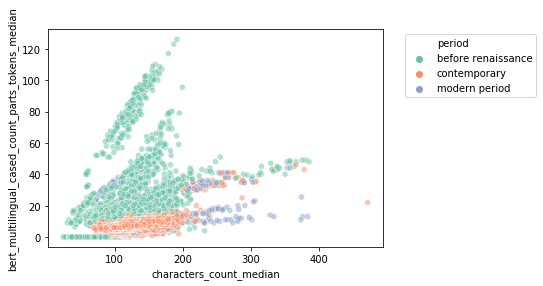

In [71]:
sns.scatterplot(x = "characters_count_median", y = "bert_multilingual_cased_count_parts_tokens_median",
hue = "period", data = metadata.loc[(metadata["characters_count_median"] < 500)],
palette = "Set2", alpha = 0.5
)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')


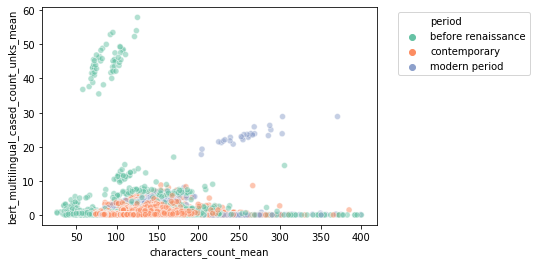

In [75]:
sns.scatterplot(x = "characters_count_mean", y = "bert_multilingual_cased_count_unks_mean",
hue = "period", data = metadata.loc[(metadata["characters_count_mean"] < 400)],
palette = "Set2", alpha = 0.5
)
plt.legend( bbox_to_anchor=(1.05, 1), loc='upper left')
